In [1]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer



In [2]:
df = pd.read_pickle('dataset_sentimens.pckl')

In [3]:
cluster_variables = ['public_metrics.retweet_count', 
                    'public_metrics.reply_count', 
                    'public_metrics.quote_count', 
                    #'author_id', 
                    #'is_retweet', 
                    #'neun_euro_context', 
                    'positive', 
                    'negative', 
                    'neutral']

In [4]:
cluster_variables = ['public_metrics.retweet_count', 
                    'public_metrics.reply_count', 
                    'public_metrics.quote_count', 
                    #'author_id', 
                    #'is_retweet', 
                    #'neun_euro_context', 
                    'positive', 
                    'negative', 
                    'neutral']

In [5]:
stop_words_german = list()
with open('stopp_wörter_deutsch.txt','r') as file:
   
    # reading each line    
    for line in file:
   
        # reading each word        
        for word in line.split(','):
   
            # displaying the words           
            stop_words_german.append(word.replace(' ',''))

In [6]:
X = df[cluster_variables].to_numpy()
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [7]:
len(df['text'].unique())

5751

In [8]:
df['text'] = df['text'].str.replace('\n',' ')
corpus = df['text']
vectorizer = TfidfVectorizer(stop_words=stop_words_german)
X = vectorizer.fit_transform(corpus)
vectorizer.get_feature_names()


X = X.toarray() 

C:\Users\tikac\anaconda3\envs\dc\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['auãÿen', 'auãÿer', 'auãÿerdem', 'auãÿerhalb', 'chlich', 'chste', 'darã¼ber', 'darã¼berhinaus', 'daãÿ', 'dã¼rfte', 'dã¼rften', 'dã¼rftest', 'dã¼rftet', 'fã¼r', 'gegenã¼ber', 'gemã', 'grã¼ndlich', 'hrend', 'hã', 'kã', 'muãÿ', 'muãÿt', 'mã¼ssen', 'mã¼ãÿt', 'nnen', 'nnt', 'nnte', 'nnten', 'nntest', 'nntet', 'nã', 'tatsã', 'ufig', 'vorã¼ber', 'wã', 'wã¼rde', 'wã¼rden', 'wã¼rdest', 'wã¼rdet', 'zwischen', 'ã¼ber', 'ã¼berall', 'ãÿ'] not in stop_words.
  warnings.warn(
C:\Users\tikac\anaconda3\envs\dc\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [9]:
distortions_euclidean = []
distortions_minkowski = []
distortions_cityblock = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)

    distortions_euclidean.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    distortions_minkowski.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'minkowski'), axis=1)) / X.shape[0])
    distortions_cityblock.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'cityblock'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)

    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_
    
    print(k)


1
2
3
4
5
6
7
8
9


In [10]:
for key, val in mapping1.items():
    print(f'{key} : {val}')


1 : 0.993218072679704
2 : 0.9909937920589144
3 : 0.9857477490519062
4 : 0.9888361788997936
5 : 0.9838256356502728
6 : 0.9828168999767297
7 : 0.9818263950551956
8 : 0.9809797256821041
9 : 0.9802527008213172


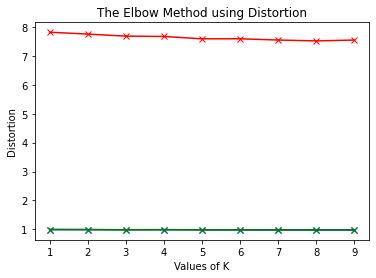

In [11]:
K = range(1,10)
plt.plot(K, distortions_euclidean, 'bx-')
plt.plot(K, distortions_minkowski, 'gx-')
plt.plot(K, distortions_cityblock, 'rx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()


In [12]:
for key, val in mapping2.items():
   print(f'{key} : {val}')

1 : 5679.3089330335215
2 : 5654.170615580373
3 : 5614.491150717402
4 : 5629.632215709083
5 : 5592.637897438824
6 : 5581.408503861807
7 : 5570.206697645719
8 : 5560.726359935453
9 : 5552.57915830919


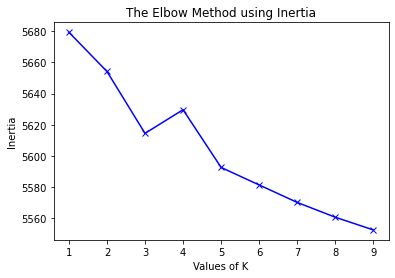

In [13]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [15]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
kmeans.labels_

cluster_centers = kmeans.cluster_centers_


In [16]:
cluster_centers[0]

array([ 5.56394808e-04,  1.05212655e-03,  1.26665529e-04, ...,
       -6.77626358e-20,  6.77626358e-20,  1.26431922e-04])

In [17]:
np.bincount(kmeans.labels_)

array([1960, 1014,   50, 2733], dtype=int64)

In [18]:
df['kmeans_label'] = kmeans.labels_

In [19]:
df['neun_euro_context'] = df['neun_euro_context']
df.groupby('kmeans_label').mean().T

kmeans_label,0,1,2,3
index,9604.185204,9405.770217,12445.300000,9535.084888
public_metrics.retweet_count,0.181633,1.019724,0.720000,0.176729
public_metrics.reply_count,0.847449,1.035503,0.180000,0.850348
public_metrics.like_count,4.330102,7.769231,2.420000,4.279546
public_metrics.quote_count,0.019388,0.144970,0.020000,0.027442
is_retweet,0.000000,0.000000,0.000000,0.000000
neun_euro_context,0.048980,0.102564,0.000000,0.055982
positive,-1.482075,-1.769546,-2.450220,-1.465013
negative,0.842702,-0.027193,1.789649,0.918076
neutral,1.323387,2.741618,1.812152,1.175083


https://towardsdatascience.com/how-to-easily-cluster-textual-data-in-python-ab27040b07d8

In [20]:
df['text'] = df['text'].str.replace('\n',' ')

In [21]:
df[df['kmeans_label']==2]

,index,text,id,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,lang,created_at,conversation_id,...,is_retweet,created_at_day,neun_euro_context,text_altered,sentiments,positive,negative,neutral,created_at_week,kmeans_label
2399,8212,Verkehrsminister Wissing hat er ein Klimaprogr...,1530100445020028929,0,0,1,0,de,2022-05-27T08:15:48.000Z,1530100445020028929,...,0,2022-05-27,False,Verkehrsminister Wissing hat er ein Klimaprogr...,neutral,-2.461076,1.646926,1.977861,21,2
2410,8238,Verkehrsminister Wissing hat er ein Klimaprogr...,1530118657501700096,1,0,1,0,de,2022-05-27T09:28:10.000Z,1530118657501700096,...,0,2022-05-27,False,Verkehrsminister Wissing hat er ein Klimaprogr...,neutral,-2.461076,1.646929,1.977858,21,2
2446,8318,Verkehrsminister Wissing hat er ein Klimaprogr...,1530170797263839239,3,1,5,0,de,2022-05-27T12:55:21.000Z,1530170797263839239,...,0,2022-05-27,False,Verkehrsminister Wissing hat er ein Klimaprogr...,neutral,-2.461076,1.646929,1.977858,21,2
2449,8321,Verkehrsminister Wissing hat er ein Klimaprogr...,1530172993112002566,0,0,0,0,de,2022-05-27T13:04:05.000Z,1530172993112002566,...,0,2022-05-27,False,Verkehrsminister Wissing hat er ein Klimaprogr...,neutral,-2.461076,1.646929,1.977858,21,2
2474,8377,Verkehrsminister Wissing hat er ein Klimaprogr...,1530220035049930752,0,0,0,0,de,2022-05-27T16:11:01.000Z,1530220035049930752,...,0,2022-05-27,False,Verkehrsminister Wissing hat er ein Klimaprogr...,neutral,-2.461076,1.646929,1.977858,21,2
2475,8379,Verkehrsminister Wissing hat er ein Klimaprogr...,1530221899342569473,0,0,1,0,de,2022-05-27T16:18:25.000Z,1530221899342569473,...,0,2022-05-27,False,Verkehrsminister Wissing hat er ein Klimaprogr...,neutral,-2.461076,1.646929,1.977858,21,2
2479,8404,Verkehrsminister Wissing hat er ein Klimaprogr...,1530242395207524360,6,0,11,0,de,2022-05-27T17:39:52.000Z,1530242395207524360,...,0,2022-05-27,False,Verkehrsminister Wissing hat er ein Klimaprogr...,neutral,-2.461076,1.646929,1.977858,21,2
2482,8415,Verkehrsminister Wissing hat er ein Klimaprogr...,1530250355149242368,0,1,1,0,de,2022-05-27T18:11:30.000Z,1530250355149242368,...,0,2022-05-27,False,Verkehrsminister Wissing hat er ein Klimaprogr...,neutral,-2.461076,1.646929,1.977858,21,2
2483,8416,Verkehrsminister Wissing hat er ein Klimaprogr...,1530250414020562944,0,0,0,0,de,2022-05-27T18:11:44.000Z,1530250414020562944,...,0,2022-05-27,False,Verkehrsminister Wissing hat er ein Klimaprogr...,neutral,-2.461076,1.646929,1.977858,21,2
2545,8997,Verkehrsminister #Wissing hat ein Klimaprogram...,1531005068639711239,0,0,0,0,de,2022-05-29T20:10:27.000Z,1531005068639711239,...,0,2022-05-29,False,Verkehrsminister #Wissing hat ein Klimaprogram...,negative,-2.380562,2.597538,0.922585,21,2


In [22]:
list(df[df['kmeans_label']==1]['text'])

['@derFe1ix Hallo Berlin 😬  Derjenige, der das Rad da runter transportiert hat, möge es beim nächsten Mal eigenhändig wieder hoch tragen, damit er weiß, was er den den Koll/n der @BVG_Ubahn da zumutet!  Heute um 04:35 Uhr auf dem Weg zum Dienst gesehen &amp; Beseitigung sogleich veranlasst. https://t.co/6xopg35U2Y',
 'Wer in #Freiburg mit Auto, Rad oder Tram unterwegs ist, braucht aktuell noch stärkere Nerven als sonst – vor allem im Norden. Baustellen und Ersatzverkehr setzen Verkehrsteilnehmern zu. Und das fast noch fünf Monate lang. (BZ-Plus) https://t.co/hNYd2rHFAn',
 'Mit der #Straßenbahn ins Büro, dem #Fahrrad zum Bundespräsidenten und klarem Kurs auf die #Verkehrswende: Österreichs Klimaschutzministerin Leonore Gewessler im #Podcast-Gespräch mit mir. @lgewessler @Schienenallianz @DEVK_Zentrale @BMKlimaschutz https://t.co/iFXMi3IJmF',
 '@f2k1de Zug nicht, aber Fahrrad. Habe anno 2008 diesen Mini-ITX-Server (ein Chenbro ES34069 Chassis) auf dem Gepäckträger meines Brompton Faltrad